# Assignment 4, Qilin Zhou, 2/1/2024

## Question 1

In [1]:
import sklearn
import numpy as np
import os
import myutils

2024-02-03 17:02:55.421729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


OS:  macOS-10.16-x86_64-i386-64bit
python:  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
sklearn:  1.3.0
numpy:  1.24.3
pandas:  2.0.3
matplotlib:  3.7.2
tensorflow:  2.15.0
Sat Feb  3 17:03:02 2024


In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Step 1: Split into a Training Set and a Test Set

In [7]:
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Step 2: Train Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

myutils.tic()
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
myutils.toc()

Duration = 50.44


In [14]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
accuracy_forest =  accuracy_score(y_pred, y_test)
accuracy_forest

0.9705

* It takes 50.44 seconds to train a Random Forest classifier with 97.05% accuracy.

### Step 3: PCA Dimensionality Reduction

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

### Step 4: Train a new Random Forest Classifier on the Reduced Dataset

In [23]:
from sklearn.ensemble import RandomForestClassifier
myutils.tic()
forest_clf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf_reduced.fit(X_train_reduced, y_train)
myutils.toc()

Duration = 167.96


* It takes 167.96 seconds to train a new Random Forest classifier, which is slower. During PCA, we have reduced the number of features, which further decreases the max_features hyperparameter. While the optimization of the Random Forest algorithm depends on iterating through splits, fewer features make finding a good split more difficult.

In [25]:
y_pred = forest_clf_reduced.predict(X_test_reduced)
accuracy_forest_reduced =  accuracy_score(y_pred, y_test)
accuracy_forest_reduced

0.9481

* The accuracy of the new Random Forest classifier is now 94.81%, which is smaller than the previous one, as we may miss some important signals after reducing the dimensionality.

## Question 2

### Step 1: Set-up

In [4]:
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Step 2: Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib.

* Choose a subset of the dataset to avoid cluttered

In [14]:
np.random.seed(42)
index = np.random.permutation(60000)[:15000]

X = mnist["data"][index]
y = mnist["target"][index]

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

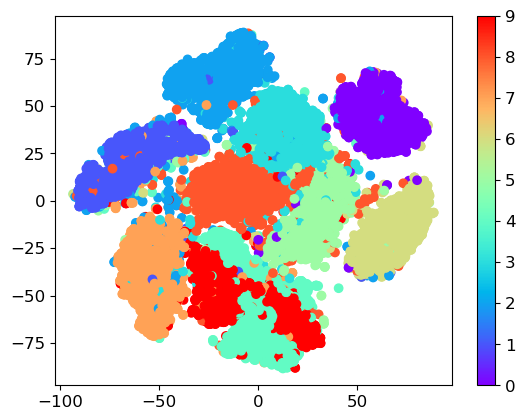

In [19]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap="rainbow")
plt.colorbar()

### Step 3: Compare with other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

* PCA

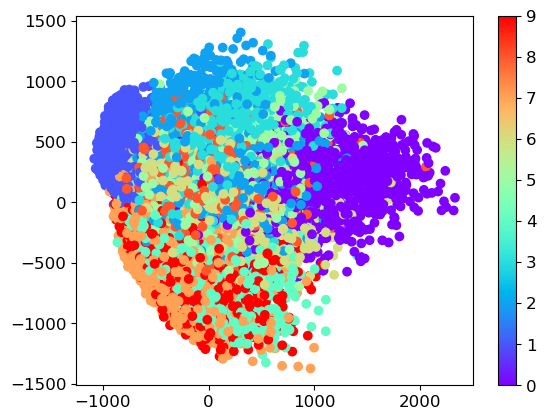

In [21]:
from sklearn.decomposition import PCA

X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
plt.scatter(X_pca_reduced [:, 0], X_pca_reduced [:, 1], c=y, cmap="rainbow")
plt.colorbar()

* We can see that although PCA runs faster, the clusters are overlapping and there are only few pronounced clusters.

* LLE

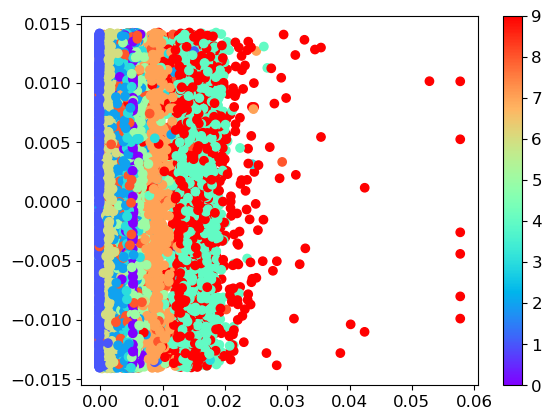

In [22]:
from sklearn.manifold import LocallyLinearEmbedding

X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
plt.scatter(X_lle_reduced [:, 0], X_lle_reduced [:, 1], c=y, cmap="rainbow")
plt.colorbar()

* We can see that LLE runs much slower. The data points on the left are vertically clustered. However, distances are not preserved on a larger scale: the left part is squeezed, and the  right part is stretched.

* MDS

/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


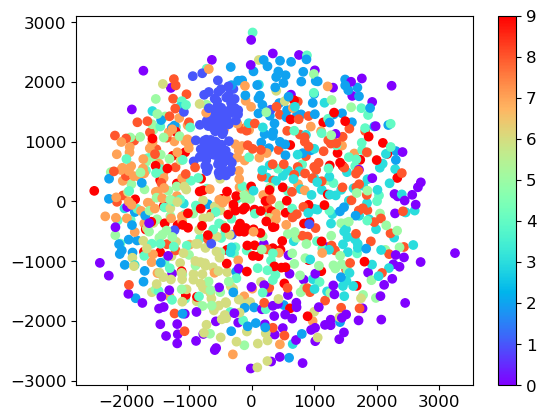

In [26]:
from sklearn.manifold import MDS

X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:1000])
plt.scatter(X_mds_reduced [:, 0], X_mds_reduced [:, 1], c=y[:1000], cmap="rainbow")
plt.colorbar()

* MDS does not perform well, where the clusters overlap a lot.

## Question 3

### Step 1: Load Data

In [27]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/qilinzhou/scikit_learn_data


In [28]:
X = olivetti.data
y = olivetti.target

### Step 2: Split it into a training set, a validation set, and a test set

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

# Choose 60% as train set, 20% as test set, 20% as validation set
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_valid_index, test_index = next(sss.split(X, y))
X_train_valid = X[train_valid_index]
y_train_valid = y[train_valid_index]
X_test = X[test_index]
y_test = y[test_index]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=66)
train_index, valid_index = next(sss.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_index]
y_train = y_train_valid[train_index]
X_valid = X_train_valid[valid_index]
y_valid = y_train_valid[valid_index]

### Step 3: Cluster the images using K-Means

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(5, 100, 5)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in k_range]

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

In [59]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_k 

85

* We have thus found the best number of clusters is 85.

In [64]:
best_model = kmeans_per_k[best_index]

In [65]:
best_model.fit(X_train)

/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=85, random_state=42)

In [82]:
def plot_faces(faces, clusters, n_cols=10):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows))
    for index, (face, cluster) in enumerate(zip(faces, clusters)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
    plt.show()

Cluster 0


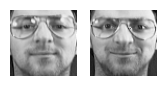

Cluster 1


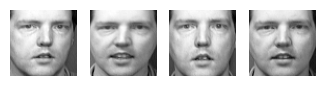

Cluster 2


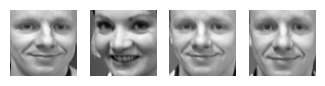

Cluster 3


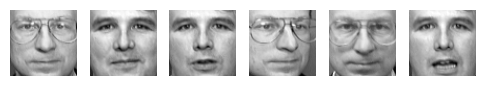

Cluster 4


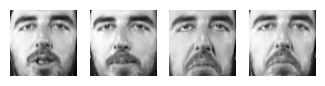

Cluster 5


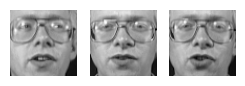

Cluster 6


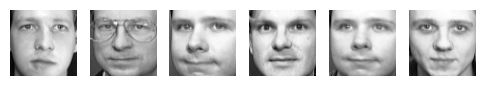

Cluster 7


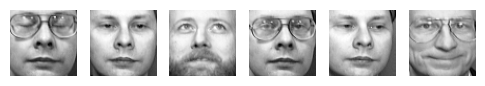

Cluster 8


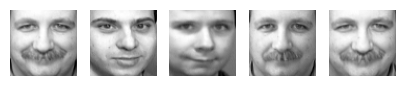

Cluster 9


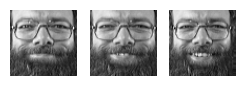

Cluster 10


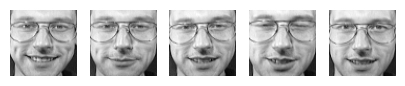

Cluster 11


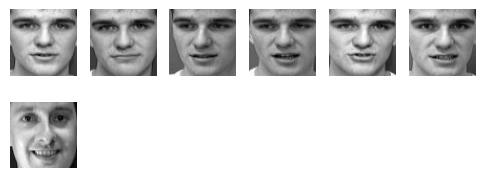

Cluster 12


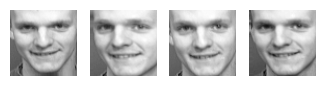

Cluster 13


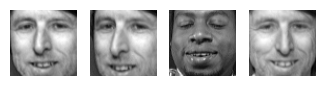

Cluster 14


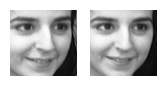

Cluster 15


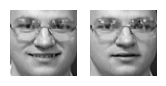

Cluster 16


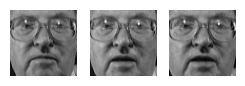

Cluster 17


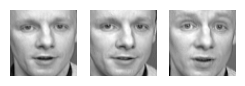

Cluster 18


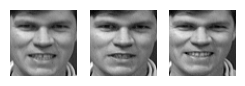

Cluster 19


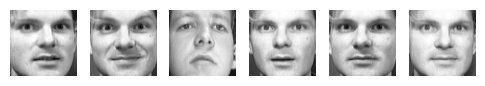

Cluster 20


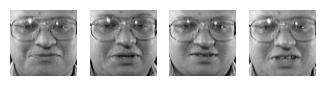

Cluster 21


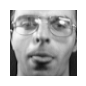

Cluster 22


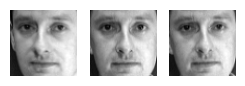

Cluster 23


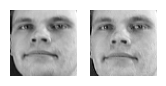

Cluster 24


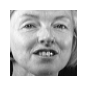

Cluster 25


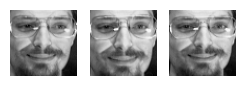

Cluster 26


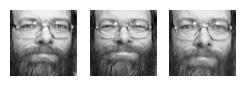

Cluster 27


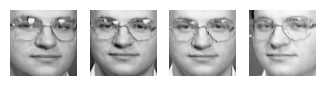

Cluster 28


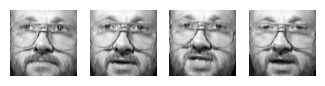

Cluster 29


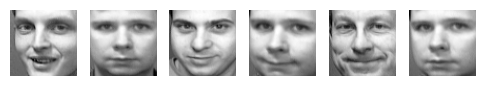

Cluster 30


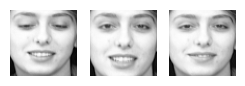

Cluster 31


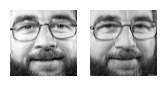

Cluster 32


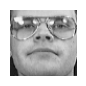

Cluster 33


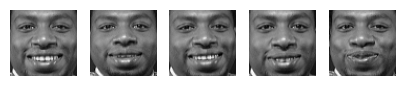

Cluster 34


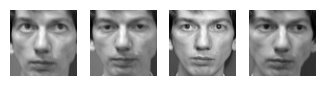

Cluster 35


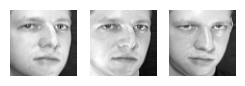

Cluster 36


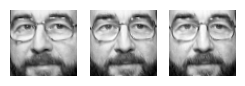

Cluster 37


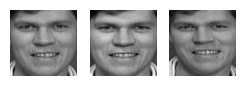

Cluster 38


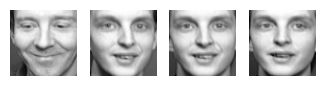

Cluster 39


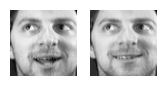

Cluster 40


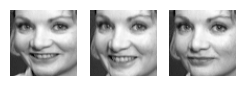

Cluster 41


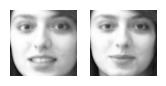

Cluster 42


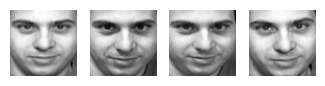

Cluster 43


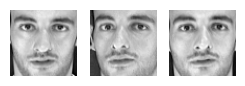

Cluster 44


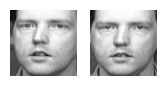

Cluster 45


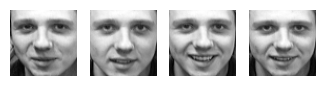

Cluster 46


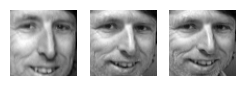

Cluster 47


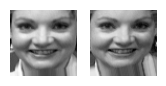

Cluster 48


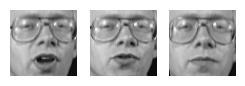

Cluster 49


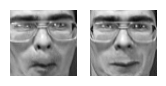

Cluster 50


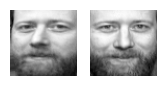

Cluster 51


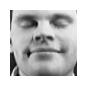

Cluster 52


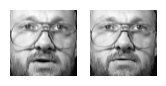

Cluster 53


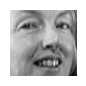

Cluster 54


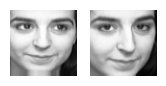

Cluster 55


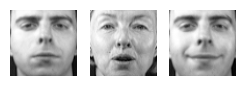

Cluster 56


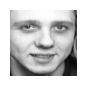

Cluster 57


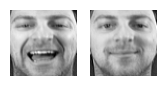

Cluster 58


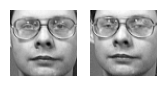

Cluster 59


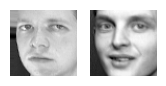

Cluster 60


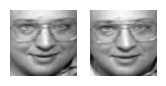

Cluster 61


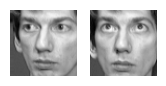

Cluster 62


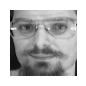

Cluster 63


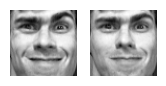

Cluster 64


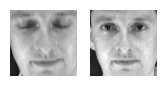

Cluster 65


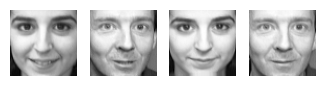

Cluster 66


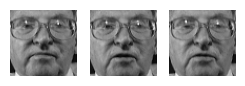

Cluster 67


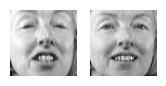

Cluster 68


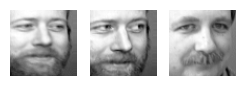

Cluster 69


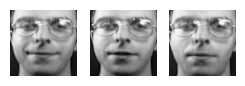

Cluster 70


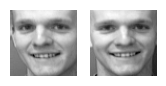

Cluster 71


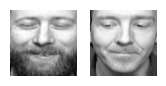

Cluster 72


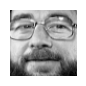

Cluster 73


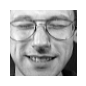

Cluster 74


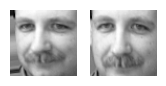

Cluster 75


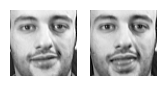

Cluster 76


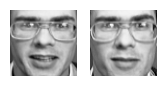

Cluster 77


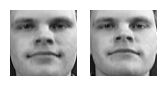

Cluster 78


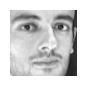

Cluster 79


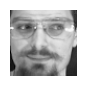

Cluster 80


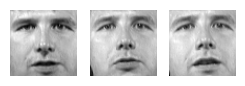

Cluster 81


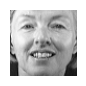

Cluster 82


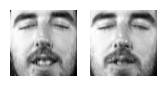

Cluster 83


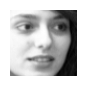

Cluster 84


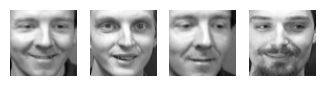

In [83]:
for cluster in np.unique(best_model.labels_):
    print(f"Cluster {cluster}")
    faces = X_train[best_model.labels_ == cluster]
    clusters = y_train[best_model.labels_ == cluster]
    plot_faces(faces, clusters)

* Many clusters only have 1 or 2 pictures. I see similar faces across clusters most often. Some clusters include different people, even with different gender and color. There are useful clusters, but the number is limited.

## Question 4

### Step 1: Train a classifier to predict which person is represented in each picture and validate it

In [94]:
from sklearn.ensemble import RandomForestClassifier

rnf = RandomForestClassifier(n_estimators=100, random_state=42)
rnf.fit(X_train, y_train)
rnf.score(X_valid, y_valid)

0.8875

* The accuracy score on the validation set is only 88.75% for the random forest classifier.

### Step 2: Use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set

In [87]:
# Use the k-means model from the last question
X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

rnf = RandomForestClassifier(n_estimators=100, random_state=42)
rnf.fit(X_train_reduced, y_train)
    
rnf.score(X_valid_reduced, y_valid)

0.7125

* The current accuracy score on the validation score is worse, only 71.25%.

### Step 3: Search for the number of clusters that allows the classifier to get the best performance

In [89]:
from sklearn.pipeline import Pipeline

for k in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=k, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    print(k, pipeline.score(X_valid, y_valid))

/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 0.525


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 0.5875


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15 0.525


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


20 0.625


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


25 0.675


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


30 0.6625


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


35 0.7125


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


40 0.6875


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


45 0.7125


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


50 0.7375


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


55 0.7


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


60 0.725


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


65 0.725


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


70 0.725


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


75 0.725


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


80 0.7375


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


85 0.7125


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


90 0.6875


/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


95 0.7125


* The best number of clusters in this case is 80, with 73.75% accuracy score. However, the performance remains worse than the one prior to dimensionality reduction.

### Step 4: Append the features from the reduced set to the original features (again, searching for the best number of clusters)

In [99]:
# Using the best number of clusters searched above
best_model = KMeans(n_clusters=80, random_state=42)
X_train_reduced = best_model.fit_transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

/Users/qilinzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [100]:
X_train_appended = np.c_[X_train, X_train_reduced]
X_valid_appended = np.c_[X_valid, X_valid_reduced]
X_test_appended = np.c_[X_test, X_test_reduced]

In [101]:
rnf = RandomForestClassifier(n_estimators=100, random_state=42)
rnf.fit(X_train_appended, y_train)
rnf.score(X_valid_appended , y_valid)

0.875

* Appending the features from the reduced set performs better than the previous one (increase from 73.75% to 87.5%). However, this performance is worse than the initial one without cluster features, which is 88.75%.